In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

files.upload()
files.upload()
mj = pd.read_csv('Jordan.csv')
lb = pd.read_csv('Lebron.csv')

Saving Jordan.csv to Jordan.csv


Saving Lebron.csv to Lebron.csv


In [2]:
mj = mj.drop(['opp','result','mp','fg','fga','threeatt','ft','fta','ftp','orb','drb','game_score'], axis=1)
lb = lb.drop(['Age','Tm', 'Opp','GS','MP','FG','FGA','3PA','FT','FTA','FT%','ORB','DRB','PF','GmSc','+/-','Unnamed: 5','Unnamed: 7'], axis=1)
lb = lb.set_axis(['game','date','fgp','three','threep','trb','ast','stl','blk','tov','pts'], axis=1)

lb['stock']=lb['stl']+lb['blk']
mj['stock']=mj['stl']+mj['blk']

mj = mj.drop(['stl','blk'], axis=1)
lb = lb.drop(['stl','blk'], axis=1)

mj['date'] = pd.to_datetime(mj['date'])
lb['date'] = pd.to_datetime(lb['date'])

lb['game'] = pd.to_numeric(lb['game'], errors='coerce')
mj['game'] = pd.to_numeric(mj['game'], errors='coerce')

lb["player"] = "LeBron James"
mj["player"] = "Michael Jordan"

df = pd.concat([lb, mj])
df = df.drop(['game','age','team'], axis=1)
df["threep"].fillna(0, inplace=True)

<ipython-input-2-c5496a31b85e>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["threep"].fillna(0, inplace=True)


Choose a stat to plot:
1: PTS
2: AST
3: TRB
4: TOV
5: FGP
6: THREEP
7: STOCK
Enter the number of the stat you want to plot (e.g., 1 for PTS): 3


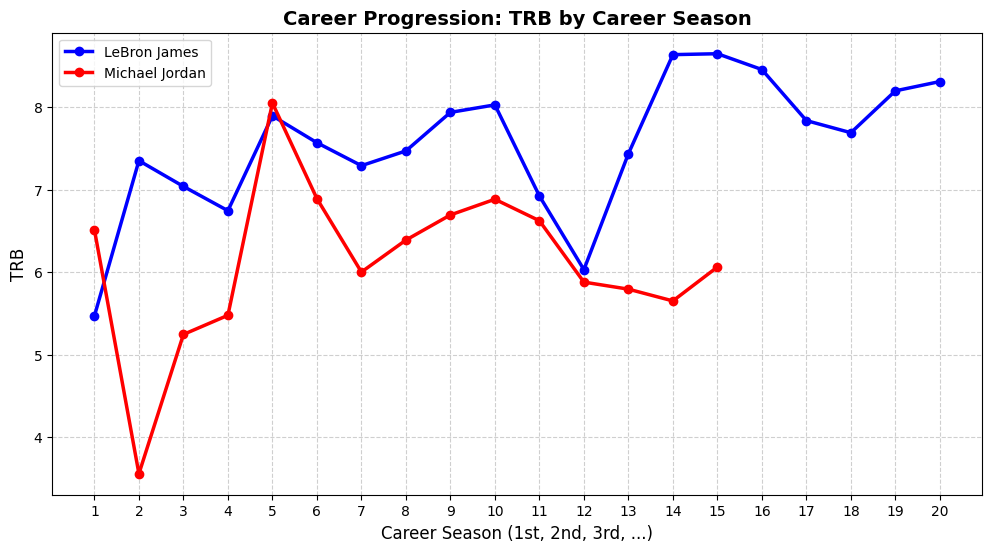

In [4]:
available_stats = {
    "1": "pts",
    "2": "ast",
    "3": "trb",
    "4": "tov",
    "5": "fgp",
    "6": "threep",
    "7": "stock"
}
print("Choose a stat to plot:")
for key, value in available_stats.items():
    print(f"{key}: {value.upper()}")

choice = input("Enter the number of the stat you want to plot (e.g., 1 for PTS): ")

if choice not in available_stats:
    print("Invalid choice! Please run the code again and choose a valid option.")


else:
    choice = available_stats[choice]
    temp_df = df

    temp_df['season'] = temp_df['date'].apply(lambda x: x.year if x.month >= 10 else x.year - 1)
    temp_df = temp_df.groupby(["player", "season"]).mean().reset_index()
    temp_df["career season"] = temp_df.groupby("player").cumcount() + 1

    plt.figure(figsize=(12, 6))
    plt.plot(temp_df[temp_df["player"] == "LeBron James"]["career season"],
             temp_df[temp_df["player"] == "LeBron James"][choice],
             marker="o", linestyle="-", linewidth=2.5, label="LeBron James", color="blue")

    plt.plot(temp_df[temp_df["player"] == "Michael Jordan"]["career season"],
             temp_df[temp_df["player"] == "Michael Jordan"][choice],
             marker="o", linestyle="-", linewidth=2.5, label="Michael Jordan", color="red")

plt.xticks(range(1, max(temp_df["career season"]) + 1))
plt.title(f"Career Progression: {choice.upper()} by Career Season", fontsize=14, fontweight="bold")
plt.xlabel("Career Season (1st, 2nd, 3rd, ...)", fontsize=12)
plt.ylabel(f"{choice.upper()}", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 0 to 1071
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   game    2493 non-null   int64         
 1   date    2493 non-null   datetime64[ns]
 2   fgp     2493 non-null   float64       
 3   three   2493 non-null   int64         
 4   threep  2493 non-null   float64       
 5   trb     2493 non-null   int64         
 6   ast     2493 non-null   int64         
 7   tov     2493 non-null   int64         
 8   pts     2493 non-null   int64         
 9   stock   2493 non-null   int64         
 10  player  2493 non-null   object        
 11  age     1072 non-null   object        
 12  team    1072 non-null   object        
 13  season  2493 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(3)
memory usage: 292.1+ KB
